<a href="https://colab.research.google.com/github/atamica/test/blob/main/Practice_26_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science - это проще, чем кажется!!
## Практика: задача классификации от 0 до 9

Не забудьте заглянуть на [страницу Специализации ML](https://otus.ru/lessons/ml-specialization/)!

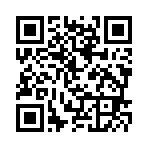

## Данные

Загружаем билиотеки, в которых реализованы основные методы, которые нам сегодня понадобятся.

**Для запуска ячеки** наведите на нее мышкой и нажмите стрелку в левом верхнем углу ячейки. Или поставьте курсор в ячеку и нажмите shift + enter

In [20]:
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split

Сегодня мы будем работать с датасетом **[MNIST](https://ru.wikipedia.org/wiki/MNIST_(%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85)**.

Набор **MNIST** - это большая коллекция изображений рукописных цифр. Это очень популярный набор данных в области обработки изображений. Он часто используется для тестирования алгоритмов машинного обучения.

MNIST - это сокращение от модифицированной базы данных Национального института стандартов и технологий.

MNIST содержит коллекцию из  70 000 изображений 28 x 28  рукописных цифр от  0 до 9.



Загружаем данные с помощью библиотеки `pandas`. Pandas - это одна из наиболее популрных библиотек дл работы с данными. В ней реализованы многие методы, которые позволяют сильно упростить работу по анализу данных.

Данные хранятся в формате `csv` - это почти excel-таблица, но не совсем ;)

**CSV** (от англ. Comma-Separated Values — значения, разделённые запятыми) — текстовый формат, предназначенный для представления табличных данных. Строка таблицы соответствует строке текста, которая содержит одно или несколько полей, разделенных запятыми.

In [21]:
import pandas as pd
#data = pd.read_csv("data.csv", nrows = 10000)
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.head(10000)
y = y[:10000].astype(int)
print(X.shape, y.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


(10000, 784) (10000,)


Вот как данные выглядят для компьютера: каждое изображение записано вектором длины 28*28 = 784. Значение компоненты кодирует цвет пикселя числом от 0 до 255.



In [22]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Также данные содержат метки классов (ответы). Они записаны в переменной y.

In [23]:
y[:5]

0    5
1    0
2    4
3    1
4    9
Name: class, dtype: int64

А теперь визуализируем первые несколько примеров.

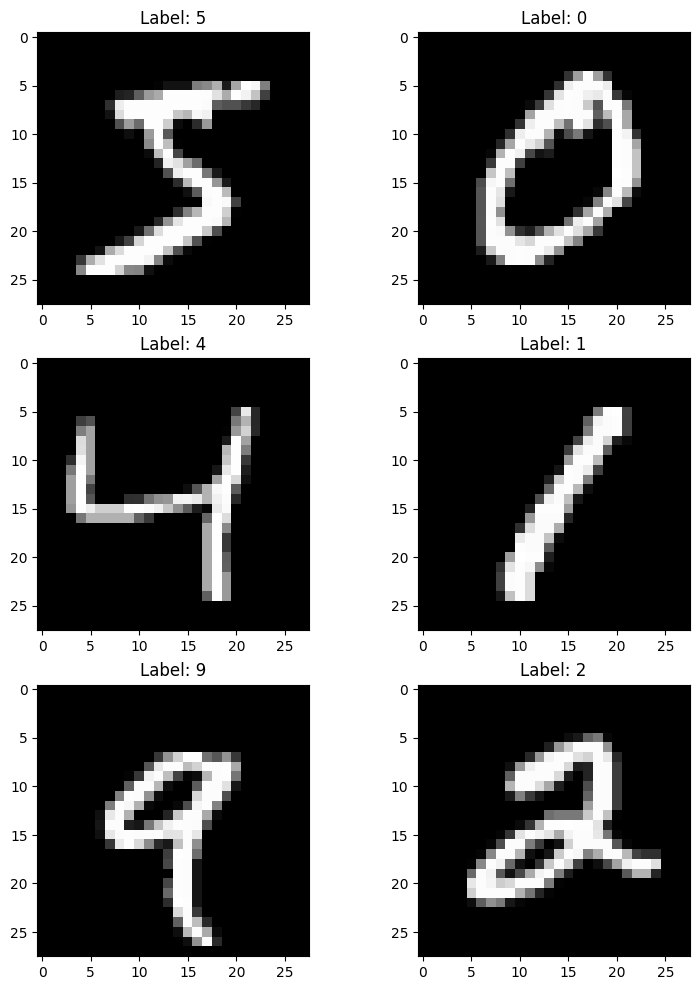

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[9,12])
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.title("Label: %i"%y[i])
    plt.imshow(np.array(X.loc[i]).reshape([28,28]),cmap='gray');

## Подготовка данных для обучения модели

Преобразуем данные в массивы `np.array`.

In [25]:
X = X.values
y = np.array(y)

Теперь данные выглят скромнее, но работать с ними стало удобнее.

In [26]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
y

array([5, 0, 4, ..., 6, 9, 7])

# Разделение на Train и Test

**Эффективность алгоритма некорректно оценивать на обучающих данных!** Это все равно что на контрольной ученику давать задачи, разобранные в классе.

Поэтому мы отложим часть данных для тестирования и оценки качества алгоритма. Для этого воспользуемся функцией `train_test_split`.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(len(X_train), len(y_train))
print(X_train[1].shape)

8000 8000
(784,)


# Обучаем дерево решений

Теперь все готово, чтобы обучить первую модель машинного обучения. Классицировать цифры будем с помощью дерева решений `tree.DecisionTreeClassifier`, реализованного в библиотеке `sklearn`.

In [29]:
#import алгоритма из библиотеки
from sklearn import tree

# инициализируем модель
clf = tree.DecisionTreeClassifier()

# обучаем ее на тренировочных данных
clf = clf.fit(X_train, y_train)

# делаем предсказание для тестовых данных
y_pred = clf.predict(X_test)


In [30]:
print('Predicted labels: ', y_pred[0:20], ".....")
print('True labels: ', y_test[0:20], ".....")


Predicted labels:  [3 2 7 7 2 9 9 7 0 3 9 5 5 3 0 5 4 4 2 8] .....
True labels:  [3 2 7 7 2 9 9 7 0 3 9 5 3 3 0 5 4 4 2 8] .....


In [31]:
diff = [i for i in range(len(y_pred)) if y_pred[i] != y_test[i]]
len(diff)

364

In [41]:
digit = [[i, 0, 0, [0 for _ in range(10)]] for i in range(10)] # digit, cnt, err
for i, el in enumerate(y_test):
  digit[el][1] += 1
  if el != y_pred[i]:
    digit[el][3][y_pred[i]] += 1

for d in digit:
  d[2] = round(sum(d[3]) / d[1], 2)

print(*sorted(digit, key=lambda x: x[3]), sep='\n')

[1, 224, 0.07, [0, 0, 1, 3, 1, 2, 5, 0, 3, 1]]
[0, 198, 0.09, [0, 0, 2, 1, 0, 4, 5, 2, 1, 3]]
[8, 180, 0.24, [0, 4, 10, 4, 5, 9, 1, 1, 0, 9]]
[9, 198, 0.23, [1, 2, 4, 4, 16, 4, 1, 9, 4, 0]]
[3, 226, 0.22, [1, 4, 11, 0, 2, 15, 2, 5, 7, 3]]
[7, 221, 0.11, [2, 1, 4, 2, 6, 3, 0, 0, 2, 5]]
[6, 193, 0.18, [2, 1, 8, 1, 3, 7, 0, 0, 9, 4]]
[4, 210, 0.23, [2, 1, 10, 1, 0, 8, 2, 3, 6, 15]]
[2, 190, 0.18, [2, 4, 0, 5, 4, 2, 2, 6, 8, 1]]
[5, 160, 0.31, [3, 3, 4, 21, 2, 0, 6, 1, 9, 1]]


# Оценка качества

Качество классификатора будем оценивать по метрике accuracy.

**Accuracy** или **точность** - это доля правильных ответов.

Для ее вычисления воспользуемся методом `metrics.accuracy_score`.

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

0.8195


Посмотрим, как на практике работает наш алгоритм!

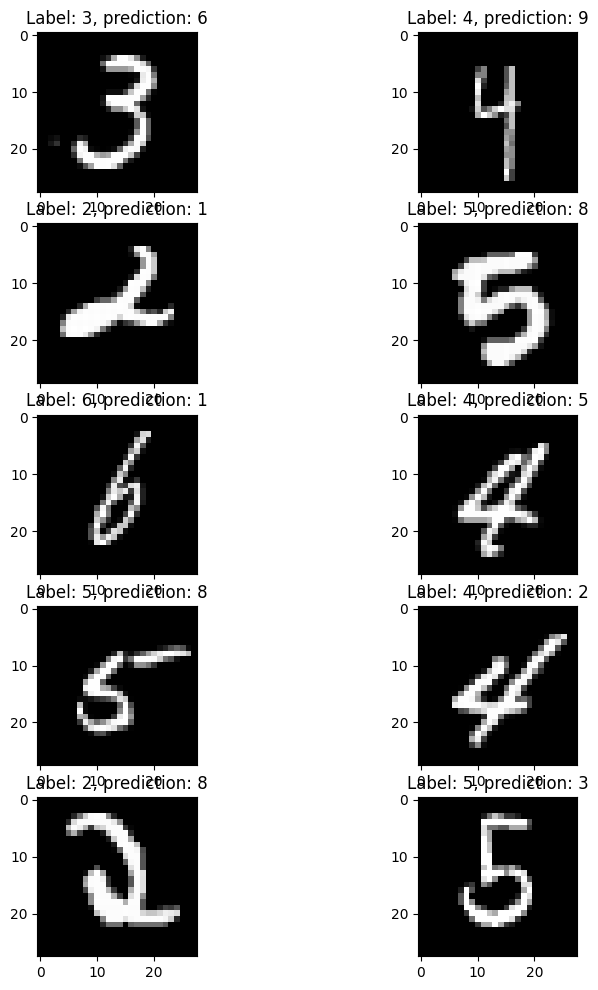

In [16]:
plt.figure(figsize=[9,12])
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title("Label: "+str(y_test[diff[i]])+", prediction: "+str(y_pred[diff[i]]))
    plt.imshow(X_test[diff[i]].reshape([28,28]),cmap='gray');

## Вуаля! As simple as that! Вот мы и построили первую ML модель!
## Первый шаг на пути к Data Science сделан!

### Стало интересно? Тогда ждем тебя на [специализации ML](https://otus.ru/lessons/ml-specialization/)!


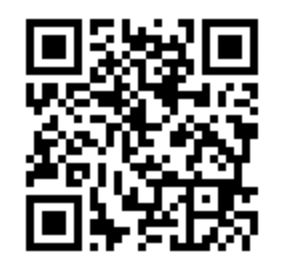